In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress
# Study data files
mouse_metadata_path = ("Resources/Mouse_metadata.csv")
study_results_path =( "Resources/Study_results.csv")

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
# Combine the data into a single dataset
data_complete = pd.merge( study_results,mouse_metadata, how="left", on= "Mouse ID")
# Display the data table for preview
data_complete.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
number_mice =len(data_complete ["Mouse ID"].unique())
number_mice

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
data_complete.duplicated(subset=['Mouse ID', 'Timepoint'])
dup= data_complete.loc[data_complete.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
dup

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
mouse_dup = data_complete[data_complete.duplicated(subset=['Mouse ID', 'Timepoint'])]
mouse_dup

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
137,g989,0,45.000000,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
comb_data= data_complete[data_complete['Mouse ID'].isin(dup)==False]

comb_data


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [6]:
# Checking the number of mice in the clean DataFrame.
clean_data =len(comb_data["Mouse ID"].unique())
clean_data

248

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
mean_T =  comb_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
mean_T
median_T = comb_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
median_T
variance_T =comb_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
variance_T
standard_T = comb_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
standard_T
sem= comb_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()
sem
summary_statistics_table= pd.DataFrame({"mean":mean_T,
                                        "median":median_T,
                                        "variance":variance_T,
                                        "standard deviation":standard_T, 
                                        "SEM":sem})
summary_statistics_table


,mean,median,variance,standard deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


<Axes: xlabel='Drug Regimen'>

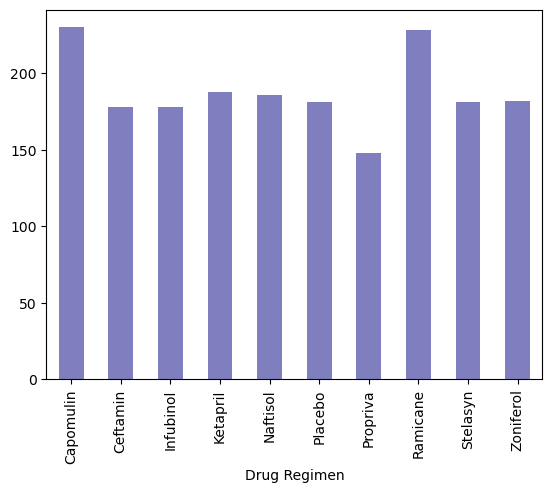

In [8]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
comb_data.groupby("Drug Regimen").count().plot(kind='bar',color= 'Navy', legend=False,alpha=0.5, align="center")

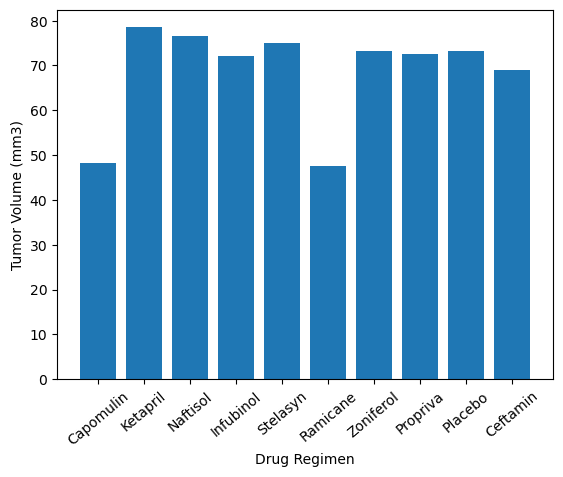

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
plt.bar(comb_data['Drug Regimen'],comb_data['Tumor Volume (mm3)'])
plt.xticks(rotation=40)
plt.xlabel('Drug Regimen')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

<Axes: ylabel='Timepoint'>

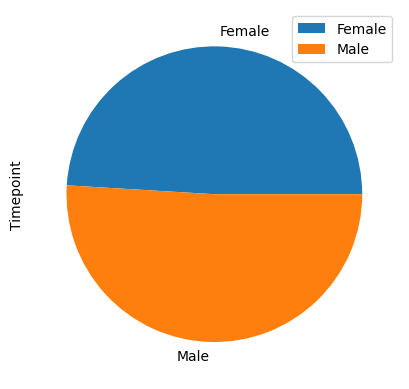

In [10]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gen_data = comb_data.groupby('Sex')[['Timepoint']].count()
gen_data .plot.pie(y='Timepoint')


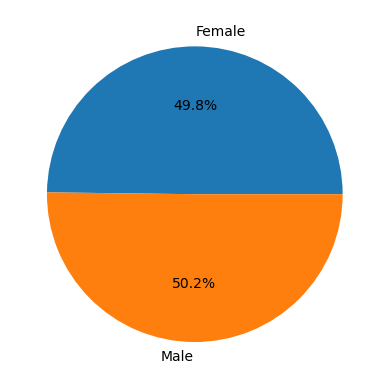

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ['Female', 'Male']
sizes = [49.799,50.2]
plt.pie (sizes,labels=labels,autopct='%1.1f%%')
plt.show()

In [ ]:
last_tumor_vol= pd.merge(greatest_timepoint, clean_combined_studyData, how ='inner', left_on = [greatest_timepoint.index,"Timepoint"],right_on=['Mouse ID','Timepoint'])
last_tumor_vol[(last_tumor_vol['Drug Regimen']=='Capomulin')| (last_tumor_vol['Drug Regimen']=='Ramicane')|(last_tumor_vol['

In [34]:

# Calculate the final tumor volume of each mouse across four of the treatment regimens:  # Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_timepoint = comb_data.groupby('Mouse ID')['Timepoint'].max().reset_index()
merge_last_vol = pd.merge(max_timepoint, comb_data, how='inner', left_on=['Mouse ID', 'Timepoint'], right_on=['Mouse ID', 'Timepoint'])
selected_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
final_tumor_volume = merge_last_vol[merge_last_vol['Drug Regimen'].isin(selected_regimens)]
final_tumor_volume

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
3,a275,45,62.999356,3,Ceftamin,Female,20,28
6,a411,45,38.407618,1,Ramicane,Male,3,22
7,a444,45,43.047543,0,Ramicane,Female,10,25
...,...,...,...,...,...,...,...,...
238,y769,45,68.594745,4,Ceftamin,Female,6,27
239,y793,45,31.896238,2,Capomulin,Male,17,17
240,y865,45,64.729837,3,Ceftamin,Male,23,26
244,z578,45,30.638696,0,Ramicane,Male,11,16


In [43]:
# Put treatments into a list for for loop (and later for plot labels)

treatment = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume =[]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in treatment:
    volume = final_tumor_volume.loc[final_tumor_volume["Drug Regimen"] == drug]["Tumor Volume (mm3)"]
    tumor_volume.append(volume)
    # Locate the rows which contain mice on each drug and get the tumor volumes
tumor_volumes= tumor_volume
    
    # add subset 
quartiles = tumor_volume.quantiles([0.25, 0.5, 0.75])
lower_quartile = quartiles[0.25]
upper_quartile = quartiles[0.75]
iqr = upper_quartile - lower_quartile
lower_bound = lower_quartile - 1.5 * iqr
upper_bound = upper_quartile + 1.5 * iqr
    
    # Determine outliers using upper and lower bounds

AttributeError: 'list' object has no attribute 'quantiles'

In [14]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.


In [15]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

In [16]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

In [17]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen